In [1]:
from __future__ import division
%matplotlib inline
import sys
import os
import numpy as np
import geopandas as gpd 
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import matplotlib.mlab as mlab
import seaborn as sns
from scipy import stats
import statsmodels.formula.api as smfrmla
import statsmodels.api as sm
import contextily as ctx
crs={'init':'epsg:4326'}


In [2]:
df=pd.read_csv("hlb.csv")
import geopandas as gpd
import pyproj
coords = df[['Latitude','Longitude']]
gpdfile = gpd.GeoDataFrame(
    coords, geometry=gpd.points_from_xy(coords['Longitude'], coords['Latitude']), crs="EPSG:4326")

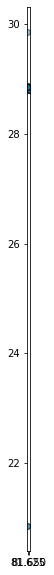

In [3]:
df = gpd.read_file(gpd.datasets.get_path('nybb'))
ax = gpdfile.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')

In [4]:
df=pd.read_csv("hlb.csv")
df

,S.N.,Farmer's Name,Address,Longitude,Latitude,Slope facing,Altitude,Starch-iodine test,Disease Scale
0,1,Khadga Sunar,"Dullu-11,kalbhairab",81.614168,28.861535,East,1321,Negative,0
1,2,Hire Sunar,"Dullu-11,kalbhairab",81.607863,28.864925,North East,1416,Negative,0
2,3,Dipendra Malla,"Dullu-11,kalbhairab",81.605558,28.854821,East,1436,Negative,0
3,4,Chhabilal Bogati,"Dullu-11,kalbhairab",81.610642,28.849538,East,1446,Positive,2
4,5,Dambar Bahadur Thapa,"Dullu-11,kalbhairab",81.665850,28.805139,East,1151,Positive,1
5,6,Suman Bogati,"Dullu-11,kalbhairab",81.665883,28.805133,East,1154,Positive,1
6,7,Bhim Bahadur Bogati,"Dullu-11,kalbhairab",81.662113,28.803328,East,1263,Positive,1
7,8,Haris Nepali,"Dullu-11,kalbhairab",81.662630,28.799559,North,1291,Negative,0
8,9,Resham Khatri,"Dullu-11,kalbhairab",81.660704,28.798335,North,1341,Negative,0
9,10,Ram Bahadur Khadka,"Dullu-11,kalbhairab",81.660282,28.802015,North,1298,Negative,0


!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

from google.colab import drive
drive.mount('/content/drive')

sett = gpd.read_file('/content/drive/My Drive/Colab/jupyter/site selection/settl_pt.shp')
dist = gpd.read_file('/content/drive/My Drive/Colab/jupyter/site selection/districts.shp')
landslide = gpd.read_file('/content/drive/My Drive/Colab/jupyter/site selection/npl_landslidesp_unosat_150505.shp')
hydro = gpd.read_file('/content/drive/My Drive/Colab/jupyter/site selection/hydro_ln.shp')
tran = gpd.read_file('/content/drive/My Drive/Colab/jupyter/site selection/trans_ln.shp')
roads = gpd.read_file('/content/drive/My Drive/Colab/jupyter/site selection/roads.shp')
land= gpd.read_file('/content/drive/My Drive/Colab/jupyter/site selection/landuse.shp')

In [7]:
dist=gpd.read_file("districts.shp")

CRSError: Invalid projection: epsg:8848: (Internal Proj Error: proj_create: crs not found)

# New Section

In [ ]:
sett

In [ ]:
fig, ax = plt.subplots(1, figsize=(20, 10))

sett.plot(column='DDVDC', cmap='Blues', linewidth=0.8,legend=True, ax=ax, edgecolor='0.8')

In [ ]:
pd.set_option('display.max_rows', dist.shape[0]+1)
print(dist)

In [ ]:
population=[257477,
197632,
268613,
250898,
195159,
134912,
491313,
687708,
426576,
304651,
182459,
579984,
142094,
261770,
552583,
133274,
336067,
163412,
754777,
186557,
36700,
211746,
271061,
280160,
50858,
290254,
171304,
812650,
108921,
775709,
136948,
451248,
571936,
492098,
1744240,
381937,
206312,
468132,
167724,
627580,
420477,
6538,
965370,
55286,
13452,
113641,
310864,
332644,
277471,
147984,
261180,
191817,
146590,
601017,
228102,
202646,
43300,
686722,
224506,
53018,
154272,
880196,
242444,
158742,
639284,
769729,
296192,
287798,
637328,
105886,
763487,
350804,
289148,
323288,
127461,
101577,
317532]




In [ ]:
dist['population']=population

In [ ]:
dist

In [ ]:
fig, ax = plt.subplots(1, figsize=(20, 10))

dist.plot(column='population', cmap='Blues', linewidth=0.8,legend=True, ax=ax, edgecolor='0.8')

In [ ]:
landslide

In [ ]:
landslide.plot()

In [ ]:
hydro

In [ ]:
hydro.plot(figsize=(20,10),column=hydro.LEVEL,legend=True)

In [ ]:
hydroo = hydro.loc[hydro['LEVEL'] >4]
hydros= hydroo.to_crs(epsg=6207)
fig, ax = plt.subplots(1, figsize=(20, 10))

hydros.plot( cmap='Blues', linewidth=0.8,legend=True, ax=ax)
ctx.add_basemap(ax,zoom='auto',url=ctx.providers.Stamen.Watercolor)

In [ ]:
roads

In [ ]:
fig, ax = plt.subplots(1, figsize=(20, 10))

roads.plot( column='type', linewidth=1,legend=True, ax=ax)


In [ ]:
selroad = roads.loc[roads['type'] == 'primary']
print (selroad)
fig, ax = plt.subplots(1, figsize=(20, 10))
x=selroad.plot( column='type', linewidth=1,legend=True, ax=ax)
ctx.add_basemap(ax,zoom=7,url=ctx.providers.Stamen.Watercolor)

In [ ]:
land

In [ ]:
 fig, ax = plt.subplots(1, figsize=(20, 10))

land.plot(column='type', ax=ax, legend=True)

In [ ]:

lands = land[land['type'].isin(['farm','grass','pond','residental'])]
PALETTE = 'OrRd'
lands


In [ ]:
landss= lands.to_crs(epsg=3004)
ax=landss.plot(figsize=(20,10),column="type",legend=True, marker='*')
ctx.add_basemap(ax,zoom='auto',url=ctx.providers.Stamen.Watercolor)
